# Exploring the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sk

In [ ]:
df = pd.read_csv("clicks_dataset_utf8.csv")

In [ ]:
df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [ ]:
df[df['Country']=='China']

,Names,emails,Country,Time Spent on Site,Salary,Clicked
79,Cleo Moore,pede.et@Sedeu.com,China,46.467226,68987.70835,1
218,Pamela M. Cantu,posuere.enim.nisl@lectusNullam.ca,China,34.842940,37145.63297,0
246,Kylee O. Warner,cursus.in@neque.co.uk,China,19.919153,30201.25465,0


In [ ]:
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [ ]:
print(df['Salary'].mean())
print(df['Salary'].max())
print(df['Salary'].min())

52896.99246867536
100000.0
20.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [ ]:
df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Names,0
emails,0
Country,0
Time Spent on Site,0
Salary,0
Clicked,0


In [ ]:
click = df[df['Clicked'] == 1]
na_click = df[df['Clicked'] == 0 ]

In [ ]:
click.shape

(250, 6)

In [ ]:
na_click.shape

(249, 6)

In [ ]:
print("people who click: ",len(click)/len(df['Clicked'])*100,"%")

people who click:  50.1002004008016 %


In [ ]:
print("people who did not click: ",len(na_click)/len(df['Clicked'])*100,"%")

people who did not click:  49.899799599198396 %


# visualization

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

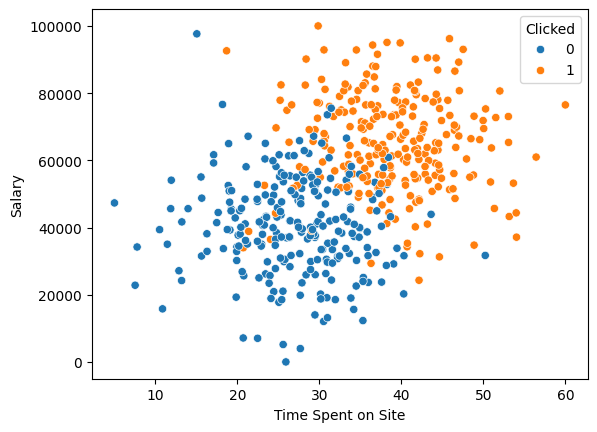

In [ ]:
sns.scatterplot(x = df['Time Spent on Site'],y = df['Salary'],hue = df['Clicked'])

<Axes: xlabel='Clicked', ylabel='Salary'>

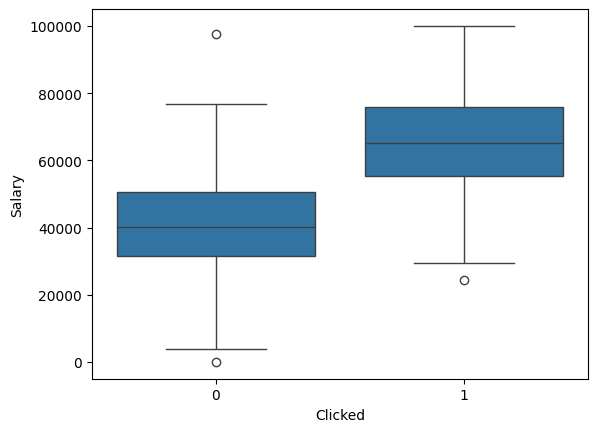

In [ ]:
sns.boxplot(x = df['Clicked'],y = df['Salary'])

<Axes: >

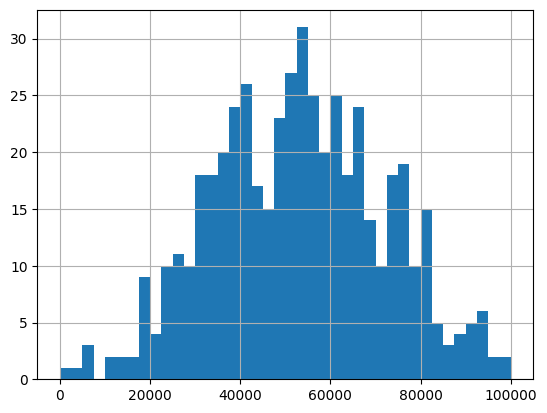

In [ ]:
df['Salary'].hist(bins = 40)

<Axes: >

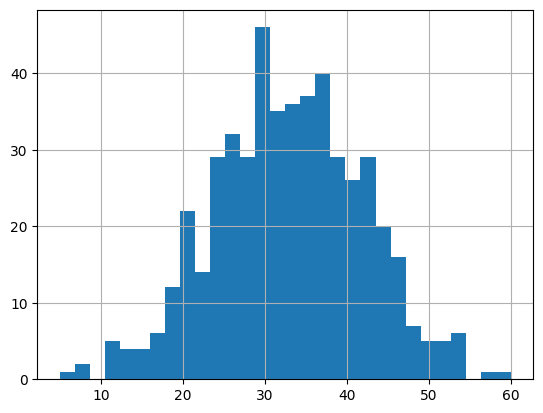

In [ ]:
df['Time Spent on Site'].hist(bins = 30)

<Axes: xlabel='Clicked', ylabel='Time Spent on Site'>

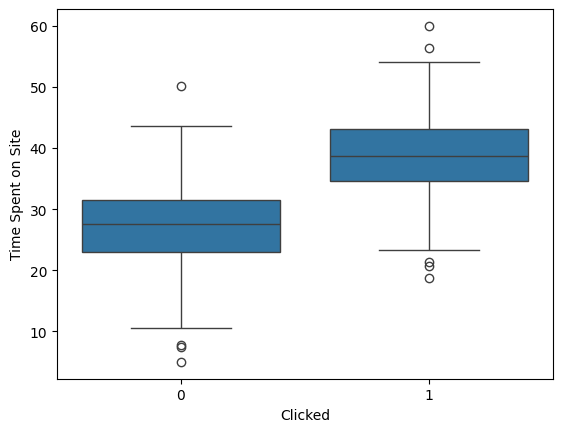

In [ ]:
sns.boxplot(x = df['Clicked'],y = df['Time Spent on Site'])

# preparing data from training

In [ ]:
df.drop(columns = ['Names','emails','Country'],inplace = True)

In [ ]:
y = df['Clicked'].values
x = df.drop('Clicked',axis =1).values

In [ ]:
x.shape

(499, 2)

In [ ]:
y.shape

(499,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# training

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [ ]:
score = model.score(x_test,y_test)
print("the accuracy is: ",score*100,"%")

the accuracy is:  89.0 %


In [ ]:
y_predict_train = model.predict(x_train)

<Axes: >

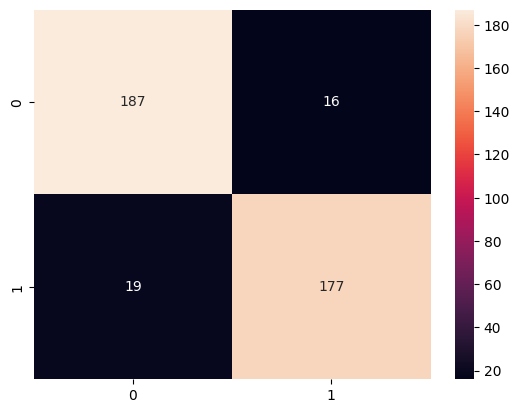

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot = True,fmt = 'd')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       203
           1       0.92      0.90      0.91       196

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399

